In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [190]:
df=pd.read_csv('red-wine-quality.csv')

In [191]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [192]:
df.shape

(1599, 12)

There are 1599 rows and 12 columns in our dataset

In [193]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All are numeric data, our target variable is int type rest all are float type of data

In [194]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the dataset

In [195]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

value of quality ranges from 3 to 8, data is quite imbalanced

In [196]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1.difference in mean and median of columns fixed acidity, free sulphurdioxide,total sulphur dioxide,sulphates suggests data is skewed in these columns

2. difference between 75% quartile and maximum value reveals there are outliers present in the columns residual sugar,free sulphuedioxide & total sulphurdioxide

3. Standard deviation is high in free sulphurdioxide,total sulphurdioxide also suggests data is widely spreaded

<AxesSubplot:>

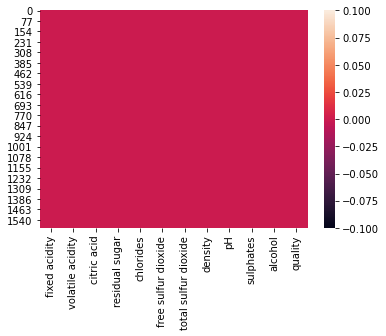

In [197]:
sns.heatmap(df.isnull())

In [198]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

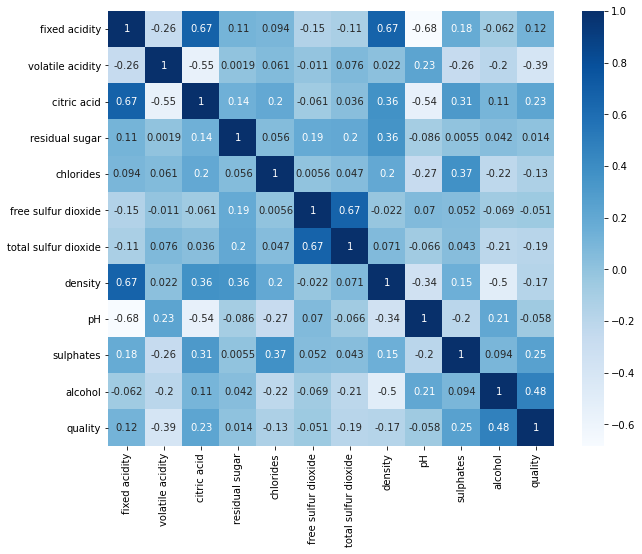

In [199]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='Blues',annot=True)

from the above map, we can conclude that pH,free sulfur dioxide and residual sugar have least correlation with the quality

In [200]:
#labelling wine quality as Not Good and good depending upon its score(3-5 as Not Good & 6-8 as Good)
binned=pd.cut(df['quality'],bins=[2,5,8],labels=['Not Good','Good'])
df['quality_label']=binned

In [201]:
df.groupby("quality_label").size()

quality_label
Not Good    744
Good        855
dtype: int64

Now we can see our target class is properly balanced

In [202]:
#Since we have new target column we can drop quality column 
df.drop('quality',axis=1,inplace=True)

In [203]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Not Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Not Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good


In [204]:
#Label Encoding for Quality Label Column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['quality_label'] = label_encoder.fit_transform(df['quality_label'])

In [205]:
df['quality_label'].value_counts()

0    855
1    744
Name: quality_label, dtype: int64

In [206]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


<AxesSubplot:>

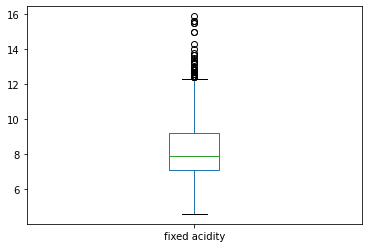

In [207]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

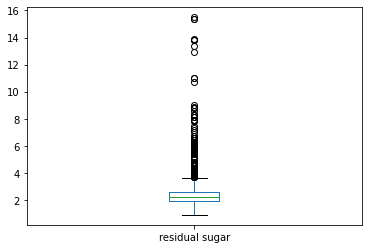

In [208]:
df['residual sugar'].plot.box()

<AxesSubplot:>

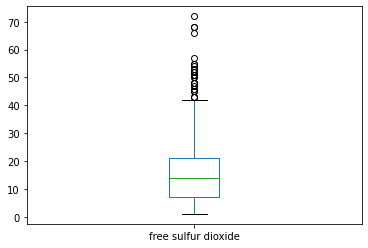

In [209]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

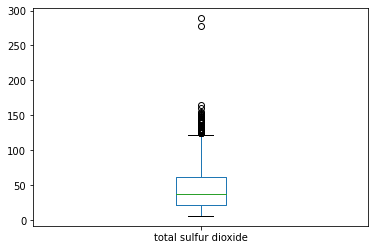

In [210]:
df['total sulfur dioxide'].plot.box()

We can see that all the four columns have outliers

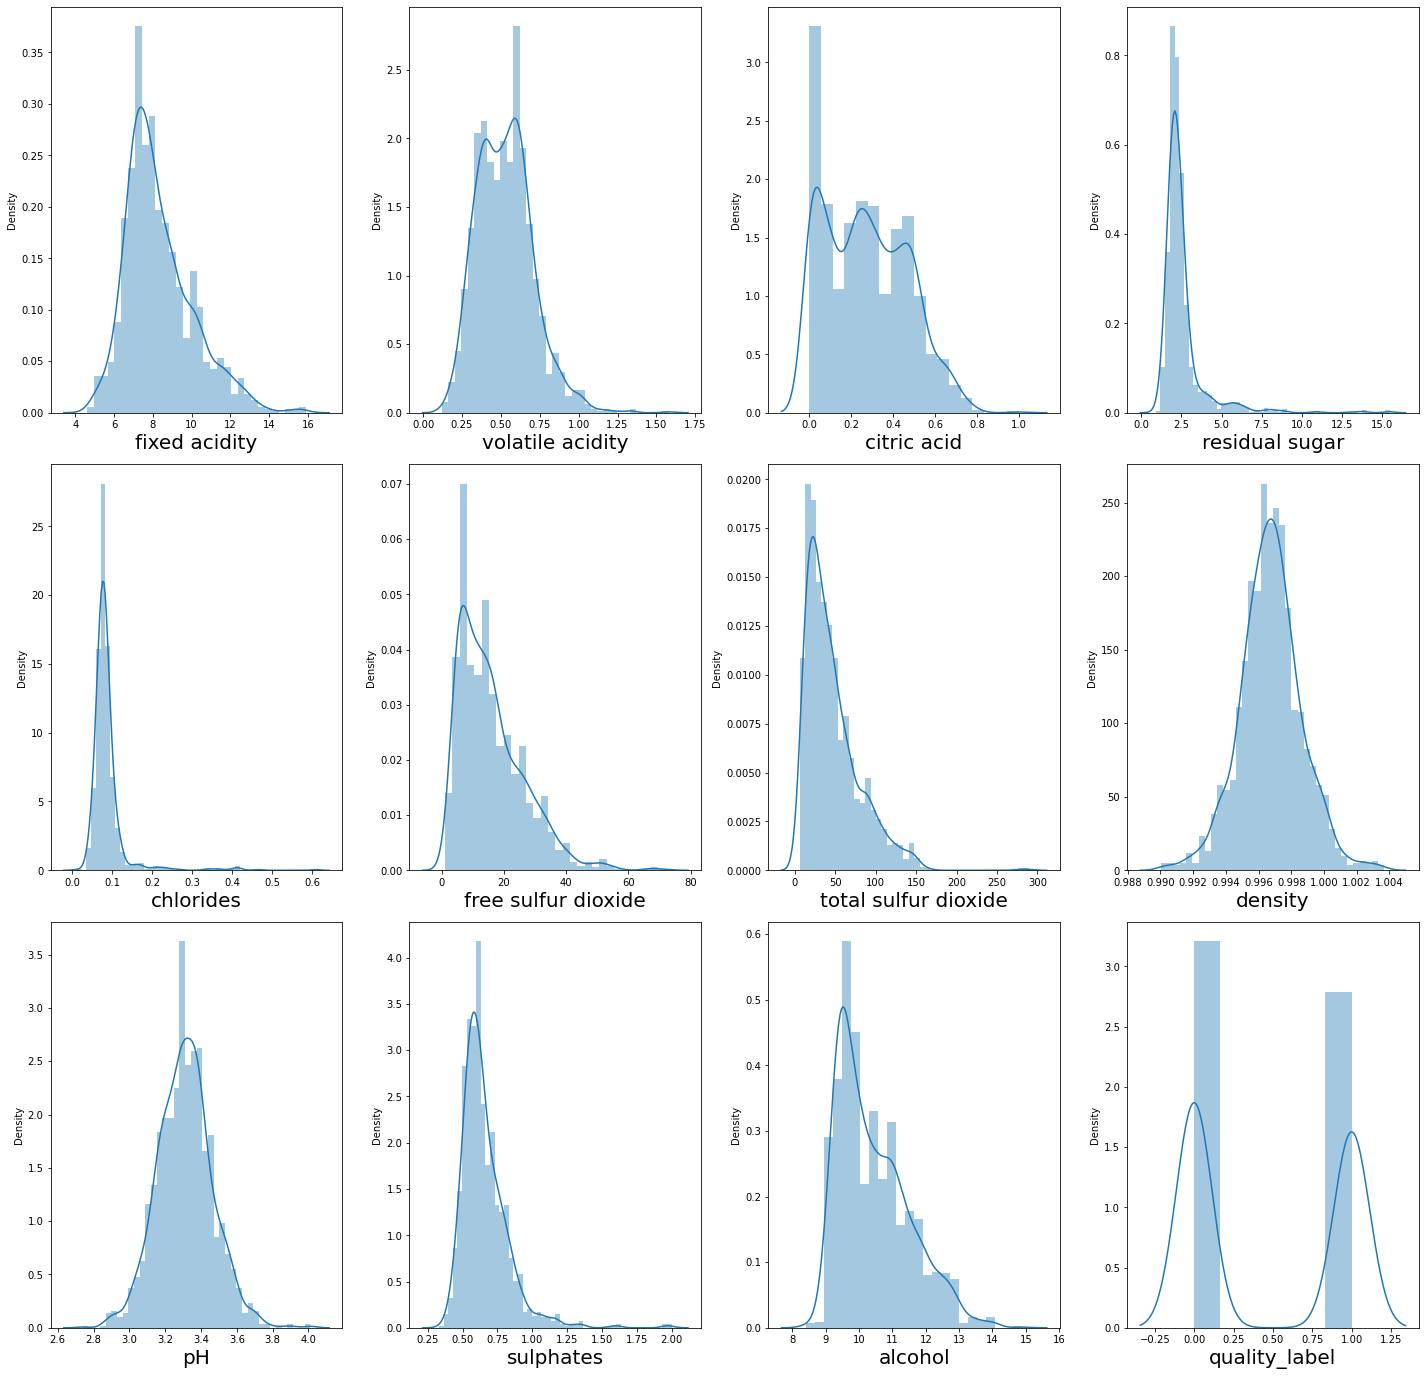

In [211]:
#Bivariate Analysis
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    

We can see that except density and pH, all other columns are skewed mostly right skewed

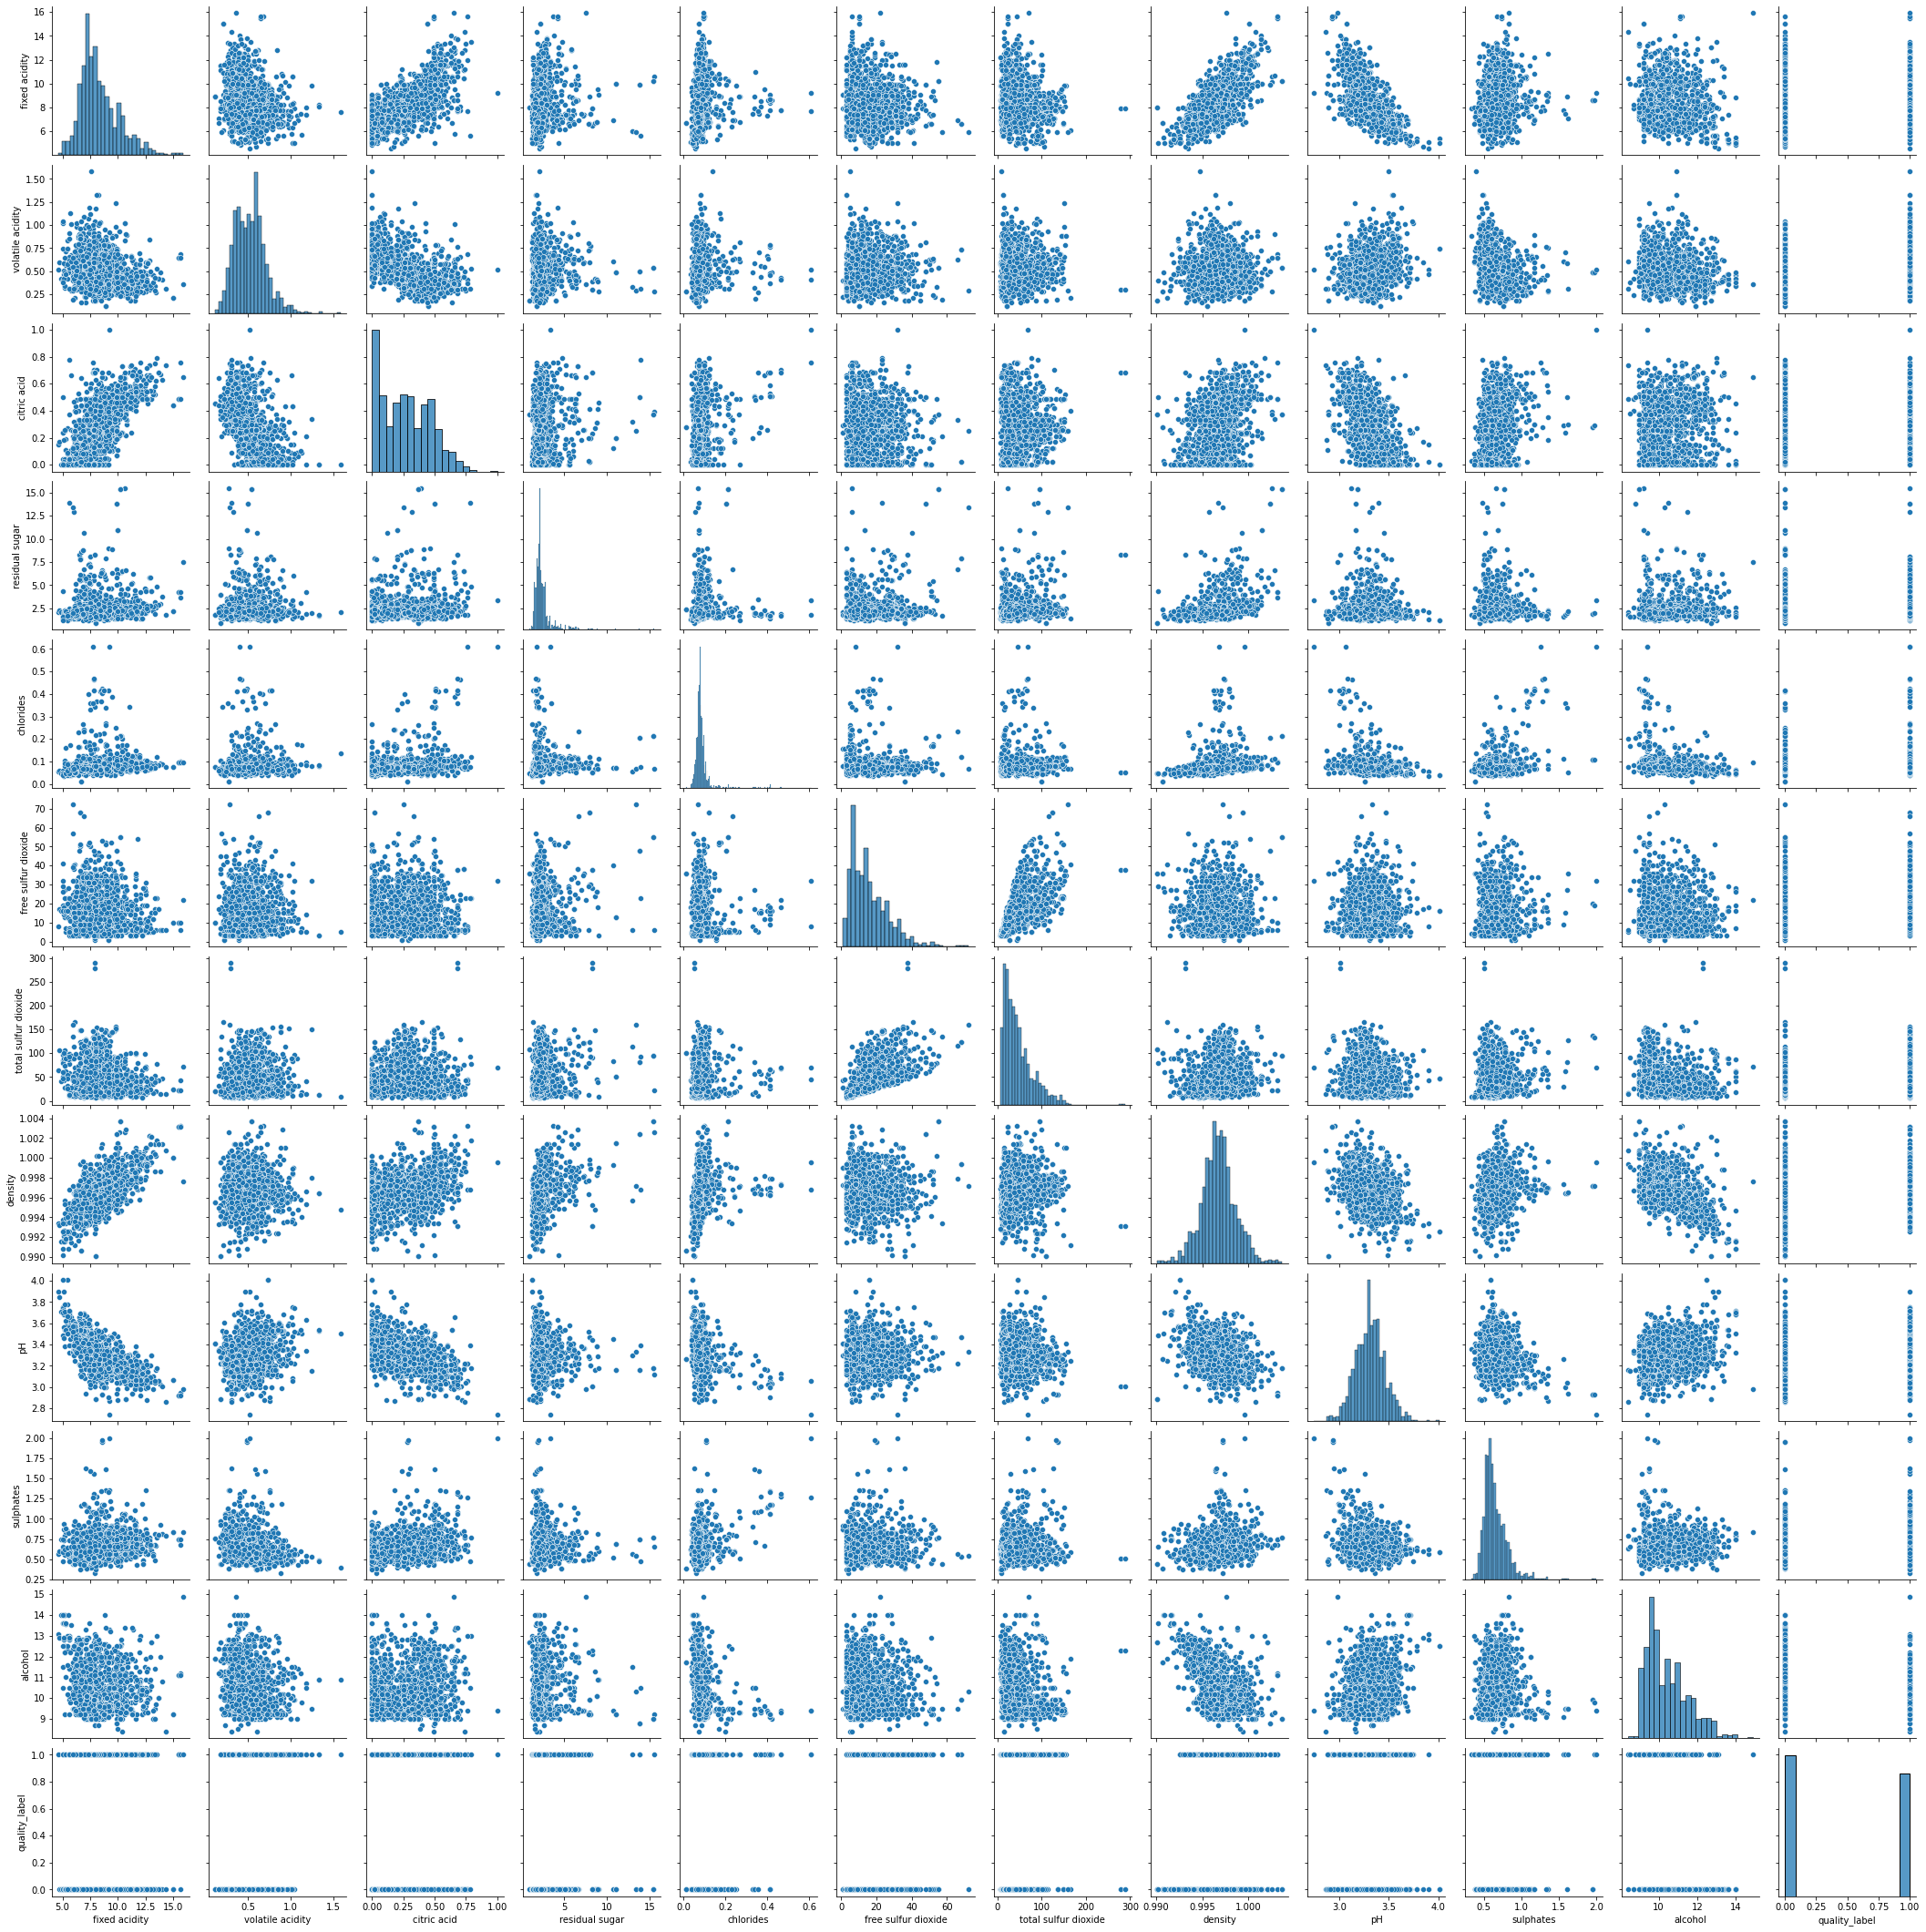

In [212]:
sns.pairplot(df)

From the above plot it is clear that there are outliers present in the data and most of the data is skewed

In [213]:
#REmoving Outliers
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df.head()

(1517, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


After removing outliers, we have 1517 rows and 12 columns in our dataset

In [214]:
df.skew()

fixed acidity           0.965654
volatile acidity        0.587072
citric acid             0.296362
residual sugar          2.285797
chlorides               1.349548
free sulfur dioxide     1.052251
total sulfur dioxide    1.224842
density                -0.023066
pH                      0.266141
sulphates               1.172587
alcohol                 0.832962
quality_label           0.152203
dtype: float64

In [215]:
x=df.drop('quality_label',axis=1)

In [216]:
y=df[['quality_label']]

In [217]:
y.shape

(1517, 1)

In [218]:
#removing the skewness using power_transform
from sklearn.preprocessing import power_transform
x_=power_transform(x)
x_=pd.DataFrame(x_,columns=x.columns)

In [219]:
x.skew()

fixed acidity           0.965654
volatile acidity        0.587072
citric acid             0.296362
residual sugar          2.285797
chlorides               1.349548
free sulfur dioxide     1.052251
total sulfur dioxide    1.224842
density                -0.023066
pH                      0.266141
sulphates               1.172587
alcohol                 0.832962
dtype: float64

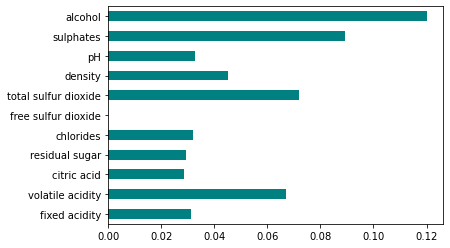

In [220]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(x,y)
feat_importances=pd.Series(importances,df_new.columns[0:len(df_new.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

From the above map, it is clear that free sulphur dioxide, residual sugar,pH and chlorides least affects the quality of the wine.

In [221]:
x.drop(['free sulfur dioxide','residual sugar','pH'],axis=1,inplace=True)

In [222]:
#lets bring all features to a common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_new=sc.fit_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)
x_new

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,-0.524453,0.969721,-1.379814,-0.242893,-0.361618,0.601298,-0.620492,-0.993452
1,-0.295965,1.980937,-1.379814,0.884707,0.701386,0.060446,0.242150,-0.614208
2,-0.295965,1.306793,-1.171273,0.577180,0.282627,0.168616,0.026490,-0.614208
3,1.646182,-1.389783,1.539760,-0.294148,0.475900,0.709468,-0.476718,-0.614208
4,-0.524453,0.969721,-1.379814,-0.242893,-0.361618,0.601298,-0.620492,-0.993452
...,...,...,...,...,...,...,...,...
1512,-1.209916,0.407934,-0.962732,0.474670,-0.039496,-0.967173,-0.476718,0.049468
1513,-1.381282,0.127041,-0.858462,-0.960457,0.185990,-0.848186,0.817245,0.713144
1514,-1.152794,-0.097674,-0.702056,-0.242893,-0.168345,-0.512858,0.745358,0.523522
1515,-1.381282,0.660738,-0.754191,-0.294148,-0.039496,-0.658888,0.457811,-0.234965


In [223]:
from sklearn.linear_model import LogisticRegression 
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)   

Best accuracy is  0.7982456140350878  on Random_state  190


In [224]:
#splitting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.30,random_state=maxRS)

0.743421052631579
[[189  50]
 [ 67 150]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       239
           1       0.75      0.69      0.72       217

    accuracy                           0.74       456
   macro avg       0.74      0.74      0.74       456
weighted avg       0.74      0.74      0.74       456



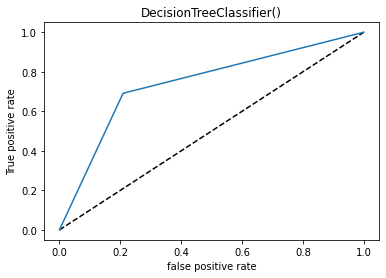

auc_score: 0.7410196093554171




In [225]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=dtc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(dtc)
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.8179824561403509
[[205  34]
 [ 49 168]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       239
           1       0.83      0.77      0.80       217

    accuracy                           0.82       456
   macro avg       0.82      0.82      0.82       456
weighted avg       0.82      0.82      0.82       456



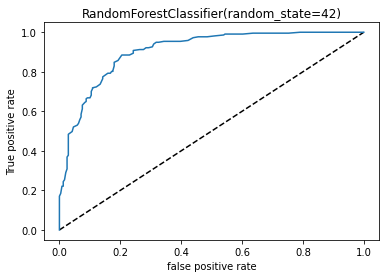

auc_score: 0.8159670670805776




In [226]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
#100 --> default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rf)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rf)
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.7982456140350878
[[190  49]
 [ 43 174]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       239
           1       0.78      0.80      0.79       217

    accuracy                           0.80       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.80      0.80      0.80       456



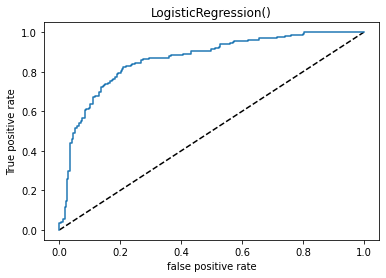

auc_score: 0.798411198735129




In [227]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=lg)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(lg)
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

In [228]:
from sklearn.model_selection import cross_val_score
dtscores=cross_val_score(dtc,x_new,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.61513158 0.68421053 0.70957096 0.68316832 0.60066007]
0.6585482890394303 0.04267098763145164


In [229]:
lgscores=cross_val_score(lg,x_new,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.71381579 0.71381579 0.81188119 0.74917492 0.73927393]
0.7455923223901337 0.03596238843842369


In [230]:
rfscores=cross_val_score(rf,x_new,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.67763158 0.72039474 0.79537954 0.74257426 0.72937294]
0.7330706096925482 0.03800146977409284


As, Logistic Regression and Random Forest Classifier have the least difference between accuracy and cross val score, we will perform hyperparameter tunning on them tpo decide which is best model

In [231]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [232]:
logistic=LogisticRegression()

In [233]:
 
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [234]:
grid_search=RandomizedSearchCV(logistic,hyperparameters,cv=5)

In [235]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']})

In [236]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'penalty': 'l2', 'C': 464.15888336127773}


0.7982456140350878
[[190  49]
 [ 43 174]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       239
           1       0.78      0.80      0.79       217

    accuracy                           0.80       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.80      0.80      0.80       456



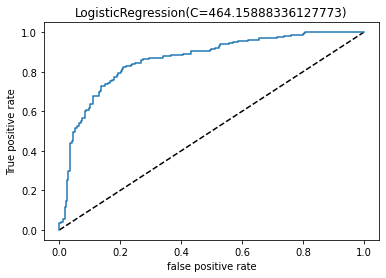

auc_score: 0.798411198735129
[0.71381579 0.71381579 0.81188119 0.74917492 0.74587459]
0.7469124544033351 0.0358271146662547




In [246]:
lr=LogisticRegression(C=464.15888336127773,penalty='l2')
lr.fit(x_train,y_train)
predlg=lr.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=lr)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(lr)
plt.show()
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print("auc_score:" ,auc_score)
lrscores=cross_val_score(lr,x_new,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())
print("\n")

In [238]:
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [239]:
tree=DecisionTreeClassifier()

In [240]:
grid_search=RandomizedSearchCV(tree,param_dist,cv=5)

In [241]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000008B4B3ECB50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000008B4B4A5A90>})

In [242]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 4}


0.7346491228070176
[[181  58]
 [ 63 154]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       239
           1       0.73      0.71      0.72       217

    accuracy                           0.73       456
   macro avg       0.73      0.73      0.73       456
weighted avg       0.73      0.73      0.73       456



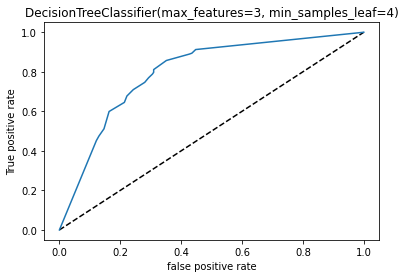

auc_score: 0.7334997975435282
[0.61842105 0.62828947 0.69966997 0.64356436 0.65016502]
0.6480219732499566 0.028133838275902393




In [247]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=None,max_features=3,min_samples_leaf=4)
tree.fit(x_train,y_train)
tree.score(x_train,y_train)
preddtc=tree.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
y_pred_prob=tree.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=tree)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(tree)
plt.show()
auc_score=roc_auc_score(y_test,tree.predict(x_test))
print("auc_score:" ,auc_score)
treescores=cross_val_score(tree,x_new,y,cv=5)
print(treescores)
print(treescores.mean(),treescores.std())
print("\n")

In [244]:
random_search=RandomizedSearchCV(estimator=rfc,param_distributions=grid_param,cv=5)

In [248]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=8,
                                                    max_features='sqrt'),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 500]})

In [249]:
best_parameters=random_search.best_params_
print(best_parameters)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'gini'}


0.8157894736842105
[[201  38]
 [ 46 171]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       239
           1       0.82      0.79      0.80       217

    accuracy                           0.82       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.82      0.82      0.82       456



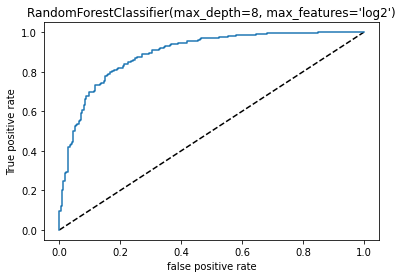

auc_score: 0.8145113086400709
[0.6875     0.71710526 0.78877888 0.72277228 0.73927393]
0.731086069133229 0.0333461502993154




In [250]:
rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rfc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rfc)
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print("auc_score:" ,auc_score)
rfcscores=cross_val_score(rfc,x_new,y,cv=5)
print(rfcscores)
print(rfcscores.mean(),rfcscores.std())
print("\n")

After hyperparameter tuning, Random Forest Classifier have the best AUC score and cross val score thus, I select it as my best model

In [251]:
import joblib
joblib.dump(rf,'red-wine.obj')

['red-wine.obj']